In [70]:
%matplotlib inline

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_excel('data/Bsp2_VPI_Hauptgruppen.xlsx',skiprows=12)
df = df.iloc[1:35]
df = df.drop('Gesamtindex', axis=1)
df.rename(columns={"Unnamed: 1": "Zeitraum"},inplace=True)
df.set_index('Zeitraum',inplace=True)

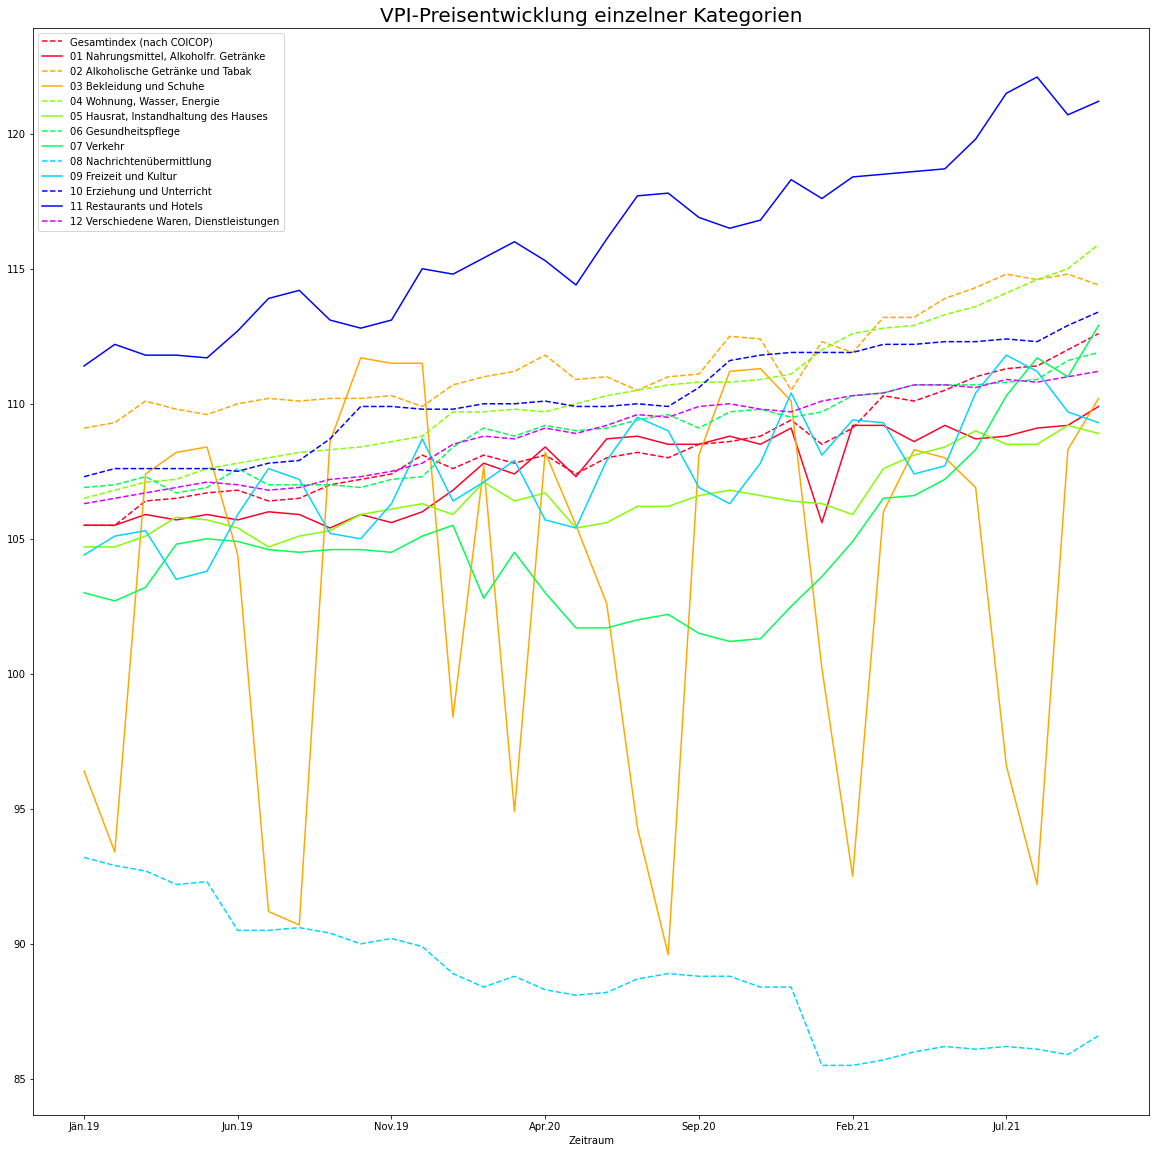

In [73]:
fig,ax = plt.subplots()
df.plot(figsize=(20,20),ax=ax)
lstyles = ['dashed','solid']
cm = plt.get_cmap('gist_rainbow')
for i,line in enumerate(ax.get_lines()):
    line.set_color(cm(i//2*2.0/len(ax.get_lines())))
    line.set_linestyle(lstyles[i%2])
ax.legend()
ax.set_title('VPI-Preisentwicklung einzelner Kategorien',fontsize=20)
plt.savefig('preisentwicklung.pdf')

In [74]:
# Werte von Jänner bis Oktober für jedes Jahr mitteln
data19 = df.iloc[0:10].mean()
data20 = df.iloc[12:22].mean()
data21 = df.iloc[24:34].mean()

def inflation19_21(row):
    return (row[2021]-row[2019])/row[2019]

means = pd.DataFrame([data19,data20,data21],index=[2019,2020,2021]).T
means['Inflation19_21'] = means.apply(inflation19_21,axis=1)
means['mittl. 1-jäh. Inflation'] = np.sqrt(1 + means['Inflation19_21'])-1
means

,2019,2020,2021,Inflation19_21,mittl. 1-jäh. Inflation
Gesamtindex (nach COICOP),106.45,108.03,110.68,0.039737,0.019675
"01 Nahrungsmittel, Alkoholfr. Getränke",105.74,108.10,108.75,0.028466,0.014133
02 Alkoholische Getränke und Tabak,109.86,111.17,113.74,0.035318,0.017506
03 Bekleidung und Schuhe,102.04,102.05,102.92,0.008624,0.004303
"04 Wohnung, Wasser, Energie",107.59,110.20,113.68,0.056604,0.027912
"05 Hausrat, Instandhaltung des Hauses",105.24,106.29,108.04,0.026606,0.013216
06 Gesundheitspflege,107.03,109.14,110.77,0.034943,0.017322
07 Verkehr,104.19,102.61,108.30,0.039447,0.019533
08 Nachrichtenübermittlung,91.53,88.59,85.98,-0.060636,-0.030792
09 Freizeit und Kultur,105.30,107.21,109.43,0.039221,0.019422
